In [124]:
from ruletree.tree.RuleTreeClassifier import RuleTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#initialize training data
breast = load_breast_cancer()
feature_names = breast.feature_names
X = breast.data
y = breast.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

You can initialize a RuleTreeClassifier similarly to sklearn Decision Trees. Analogous fit/predict function can be used

In [125]:
#initialize classifier

#prune_useless_leaves allows us to prune leaves with same prediction outcome
rtc = RuleTreeClassifier(max_depth = 3, 
                        criterion = 'gini',
                        prune_useless_leaves=True,
                        random_state = 42,
                        )

#fit RuleTreeClassifier
rtc.fit(X_train,y_train)

#get textual rules dictionary
rules = rtc.get_rules()

In [126]:
y_pred = rtc.predict(X_test)
print('Prediction results', y_pred[0:10])

Prediction results [1 0 0 1 1 0 0 0 1 1]


In [127]:
y_pred_probas = rt.predict_proba(X_test)
print('Prediction probabilities results', y_pred_probas[0:10])

Prediction probabilities results [[0.01321586 0.98678414]
 [1.         0.        ]
 [1.         0.        ]
 [0.01321586 0.98678414]
 [0.01321586 0.98678414]
 [1.         0.        ]
 [1.         0.        ]
 [1.         0.        ]
 [0.46153846 0.53846154]
 [0.01321586 0.98678414]]


In [128]:
print('Accuracy result: ', accuracy_score(y_test, y_pred))

Accuracy result:  0.9649122807017544


In [129]:
#print textual rules of trained tree
rtc.print_rules(rules)

|--- X_7 <= 0.051	398
|   |--- X_20 <= 16.83	245
|   |   |--- X_13 <= 48.7	230
|   |   |    output: 1
|   |   |--- X_13 > 48.7
|   |   |    output: 0
|   |--- X_20 > 16.83
|   |   |--- X_1 <= 16.19	15
|   |   |    output: 1
|   |   |--- X_1 > 16.19
|   |   |    output: 0
|--- X_7 > 0.051
|   |--- X_21 <= 20.405	153
|   |   |--- X_20 <= 18.145	14
|   |   |    output: 1
|   |   |--- X_20 > 18.145
|   |   |    output: 0
|   |--- X_21 > 20.405
|   |   |--- X_23 <= 718.65	139
|   |   |    output: 1
|   |   |--- X_23 > 718.65
|   |   |    output: 0


In [130]:
##get global feature explanations similar to sklearn feature_importances_ of a trained Decision Tree
feture_importances = rtc.compute_feature_importances()
feture_importances

array([0.        , 0.02516887, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.77627009, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01491592, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.07719027, 0.0661448 , 0.        , 0.04031006, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

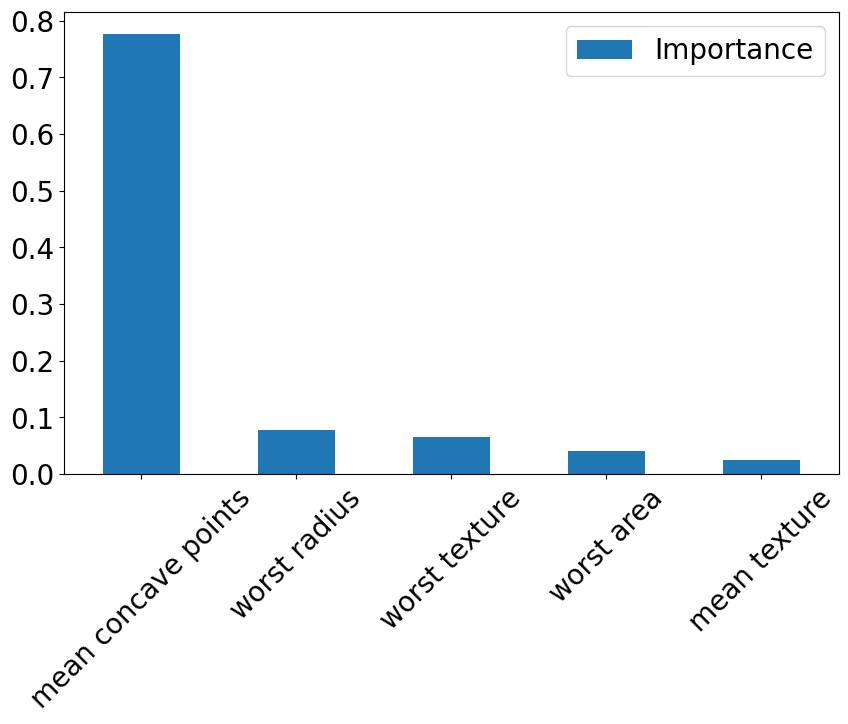

In [131]:
feat_importances = pd.DataFrame(feture_importances, index=feature_names, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.head(5).plot(kind='bar', figsize=(10,6))
plt.xticks(fontsize=20, rotation = 45)          # Increase x-tick size and rotate labels
plt.yticks(fontsize=20)                       # Increase y-tick size
plt.legend(fontsize=20)  
plt.show()

In [132]:
##get local feature explanations similar to https://github.com/andosa/treeinterpreter implementation
#where prediction is the sum of bias and feature contributions:
prediction, bias, contributions = rtc.local_interpretation(X_test, joint_contribution= True)

In [133]:
print('First instance analysis')
print(f'Prediction: {prediction[0]}')
print(f'Bias: {bias[0]}')
print(f'Contributions: {contributions[0]}')

First instance analysis
Prediction: [0.01321586 0.98678414]
Bias: [0.37437186 0.62562814]
Contributions: {(7,): array([-0.32131063,  0.32131063]), (7, 20): array([-0.03132209,  0.03132209]), (7, 13, 20): array([-0.00852327,  0.00852327])}
